In [ ]:
## Standard Stuff
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import dask.array as da
import numcodecs

## HEALPix Specific
import healpix as hp
import easygems.healpix as egh
import easygems.remap as egr

import intake     # For catalogs
import zarr       # Data Formatting

In [ ]:
# adapted from https://github.com/digital-earths-global-hackathon/catalog/blob/main/NERSC/rscream_catalog.ipynb
catfn='/home/tmerlis/hackathon/scream_main.yaml'

scream_cat = intake.open_catalog(catfn)

print (list(scream_cat)) 

In [5]:


z=6
ds3hr = scream_cat.scream_ne120(zoom=z).to_dask()
ds3hr = ds3hr.pipe(egh.attach_coords)
ds3hr.time



     


/home/tmerlis/.conda/envs/easy25/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.DataArray 'time' (time: 3168)> Size: 25kB
array([cftime.DatetimeNoLeap(2019, 8, 1, 3, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 8, 1, 6, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2019, 8, 1, 9, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(2020, 8, 31, 18, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2020, 8, 31, 21, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2020, 9, 1, 0, 0, 0, 0, has_year_zero=True)],
      shape=(3168,), dtype=object)
Coordinates:
  * time     (time) object 25kB 2019-08-01 03:00:00 ... 2020-09-01 00:00:00
    crs      int64 8B 0
Attributes:
    bounds:     time_bnds
    long_name:  time

CPU times: user 281 ms, sys: 135 ms, total: 415 ms
Wall time: 257 ms


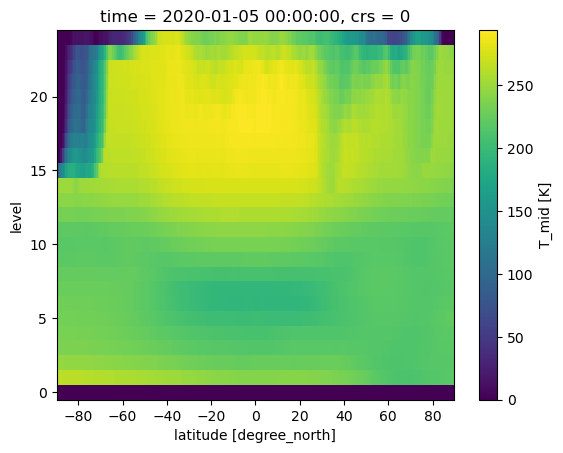

In [6]:


%%time

vt='ta'
tm='2020-01-05'
tmp=ds3hr[vt].sel(time=tm)[0]

zm = (
    tmp
    .groupby("lat")
    .mean()
).compute()

zm.plot()



     
